In [1]:
import numpy as np
from scipy import integrate, LowLevelCallable
from scipy.integrate import odeint,solve_ivp
import matplotlib.pyplot as plt
import os, ctypes
import time

In [2]:
# Initial values

In [3]:
x0 = {'xB':0.0212,'xT':0.000212,'F0':1000, 'a':1, 'T0':70, 'cT0':72, 'xP':0} 
x_0 = [x0['xB'],1-x0['xB']-x0['xT']-x0['xP'],x0['xT'],x0['a'],x0['xP'],x0['T0']+273.15]


In [4]:
prams = {'k0': 3.17e-2,                      # kmol/kgsPa
             'K0':3.17e13,                   # 1/Pa
             'E' : 5.76e7,                   # J/kmol
             'Q': 6.89e7,                    # J/kmol (-) sign
             'kd0': 1.80e-4,                 # 1/Pa/s
             'Ed': 4.53e6,                   # J/kmol
             'R': 8.3145,                    # J/mol/K
             'MT': 4.05e-4,                  # kg/kmol (from Weng, 1.03e-3, mol/kg_catalyst)
             'DeB': 4.5e-5,                  # m2/s
             'rho_Cp': 1.46e-6,              # J/m3/oC
             'eps': 0.58,
             'rho_B': 4.14e-2,               # kg/m3
             'dH': 2.09e8,                   # J/kmol
             'alpha': 0.32,                  # J/m2K
             'Le':1.48                       # W/mK             
              }


In [5]:
prm = lambda x: x

In [6]:
pr = prm(prams)

In [7]:
rho_B  = pr['rho_B']

In [8]:
def mw_g(xB,xH):
    return 78.12*xB + 2.106*xH

In [9]:
def rho_g_m2(MW_g,P,T0):
    return MW_g*273.16*P/(22.161 + 1.0132e5*T0)

In [10]:
def cp_g(xB,xH):
    return (96.86*xB + 2.902*xH)*10**4

In [11]:
def dcdt(c,t):
    xB = c[0]
    xH = c[1]
    xT = c[2]
    a  = c[3]
    xP = c[4]
    
    pram = lambda x: x
    prms = pram(prams)
    
    rho_B  = prms['rho_B']
    eps    = prms['eps']
    rho_Cp = prms['rho_Cp']
    dH     = prms['dH']
    Le     = prms['Le']
    u      = 0.01 # m/s
    P      = 1.01e5*30 # Pa
    T      = 343.15 # K
    k0     = prms['k0']
    K0     = prms['K0']
    E      = prms['E']
    Q      = prms['Q']
    kd0    = prms['kd0']
    R      = prms['R']
    MT     = prms['MT']
    DeB    = prms['DeB']
    Ed     = prms['Ed']
    
    r1 = (k0*K0*np.exp((-Q-E)/(R*T))*P**2*xB*xH)/(1 + K0*np.exp(-Q/(R*T))*P*xB)*a
    r2 = kd0*np.exp((-Ed)/(R*T))*P*xT*a
    
    dxBdt = -r1
    dxHdt = -r1
    dxPdt = r1
    dadt  = -r2
    dxTdt = -r2*MT
    
    return dxBdt,dxHdt,dxTdt,dadt,dxPdt
    
    
        

In [12]:
# implement the ODE solver

In [13]:
# for the solver
x_0 = [1.80e-2,1-1.80e-2-4.04e-4- 0,4.04e-4,1,0,56+273.15]
c0 = x_0[:-1]
c0

[0.018, 0.981596, 0.000404, 1, 0]

In [14]:
t_span = np.array([0,50])
t = np.linspace(t_span[0], t_span[1], 101)

In [15]:
c = odeint(dcdt,c0,t)
c.shape

(101, 5)

In [16]:
xB = c[:,0]
xH = c[:,1]
xT = c[:,2]
a  = c[:,3]
xP = c[:,4]

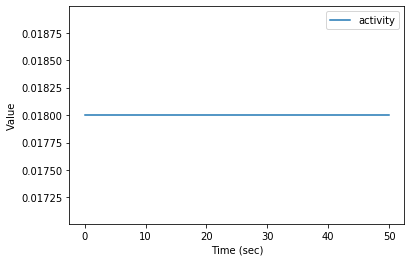

In [17]:
plt.figure(figsize = (6,4))
# plt.plot(t,xB,label = 'Benzene')
# plt.plot(t,xH,label ='H2')
# plt.plot(t,xT,label = 'Poison')
plt.plot(t,xB,label ='activity')
plt.xlabel('Time (sec)')
plt.ylabel('Value')
plt.legend()
plt.show()